# Zillow Home Value Analysis & Forecasting Project

## Project Overview

This project presents a comprehensive analysis of Zillow housing data, with a focus on time-series transformation, forecasting, and interactive visualization. The workflow is divided into Two main sections:

- **Data preparation and transformation**
- **Forecasting future home values in Oregon**

---

## Project Structure

### Part 1 – Data Preparation & Time Series Visualization

This section includes:

- Loading and inspecting the Zillow dataset.
- Reshaping the data into a long-form time series structure.
- Filtering for specific states: **California (CA), Washington (WA), Oregon (OR), Arizona (AZ), and Nevada (NV)**.
- Filtering the date range to include only data from **2010 to 2020**.
- Saving the cleaned dataset for Tableau usage.
- Resampling and plotting average yearly home values by state.

---

### Part 2 – Time Series Forecasting (Oregon)

This section focuses on forecasting home values for the state of Oregon using time series analysis:

- Filtering data for Oregon between **2000–2018**.
- Performing seasonal decomposition and checking for stationarity.
- Determining the optimal ARIMA/SARIMA parameters using ACF/PACF plots.
- Fitting manual and auto-tuned ARIMA models.
- Evaluating model performance and selecting the final forecasting model.
- Generating a 12-month future forecast for Oregon home values.

---

## Part 1: Data Preparation & Time Series Visualization

### Step 1: Load and Inspect the Data

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset from google drive
df = pd.read_csv('/content/drive/MyDrive/Dataset/zillow_home_values-zipcode.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,...,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107261.0,...,261945.0,267644.0,273946.0,280066.0,285121.0,288532.0,290458.0,291103.0,292081.0,292948.0
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,222569.0,...,453150.0,464727.0,478369.0,489712.0,497173.0,499429.0,497572.0,498113.0,500187.0,503109.0
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,90009.0,...,177319.0,179463.0,182812.0,186403.0,189836.0,192064.0,193760.0,195140.0,196787.0,198137.0
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,188096.0,...,570211.0,572145.0,573662.0,576469.0,578706.0,580834.0,581779.0,584566.0,588188.0,590722.0
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,275983.0,...,752025.0,757734.0,760336.0,766163.0,771443.0,776607.0,779281.0,782367.0,788211.0,793924.0


### Step 2: Reshape the Data into Time Series Format

In [ ]:
# Identify non-date columns (excluding date columns)
# Update this list based on the actual non-date columns in your dataframe
non_date_cols = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']

# Get the list of date columns
date_cols = [col for col in df.columns if col not in non_date_cols]

# Melt the dataframe
df_melted = pd.melt(df, id_vars=non_date_cols, value_vars=date_cols, var_name='Date', value_name='Value')

# Convert the 'Date' column to datetime objects, specifying the format
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%d%m%Y')

# Set 'Date' as index
df_melted.set_index('Date', inplace=True)

# Display the first few rows of the melted dataframe
display(df_melted.head())

# Display the data types of the melted dataframe to confirm 'Date' is datetime
print(df_melted.info())

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Value
Date,,,,,,,,,,
2000-01-31,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107261.0
2000-01-31,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,222569.0
2000-01-31,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,90009.0
2000-01-31,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,188096.0
2000-01-31,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,275983.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7546550 entries, 2000-01-31 to 2022-11-30
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   RegionID    int64  
 1   SizeRank    int64  
 2   RegionName  int64  
 3   RegionType  object 
 4   StateName   object 
 5   State       object 
 6   City        object 
 7   Metro       object 
 8   CountyName  object 
 9   Value       float64
dtypes: float64(1), int64(3), object(6)
memory usage: 633.3+ MB
None


### Step 3: Filter and Save Data for Tableau

In [ ]:
# Filter for selected states
selected_states = ['CA', 'WA', 'OR', 'AZ', 'NV']
df_filtered = df_melted[df_melted['State'].isin(selected_states)]

# Filter for years 2010 to 2020
df_filtered = df_filtered[(df_filtered.index.year >= 2010) & (df_filtered.index.year <= 2020)]

# Optional – Reset index if desired
df_filtered.reset_index(inplace=True)

# Save the filtered data to a new CSV file
df_filtered.to_csv('filtered_zillow_data.csv', index=False)

In [ ]:
df_filtered.head()

,Date,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Value
0,2010-01-31,95992,5,90011,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,209250.0
1,2010-01-31,96361,8,91331,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,257372.0
2,2010-01-31,96193,9,90650,zip,CA,CA,Norwalk,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,296430.0
3,2010-01-31,96083,12,90201,zip,CA,CA,Bell,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,271829.0
4,2010-01-31,96816,13,92335,zip,CA,CA,Fontana,"Riverside-San Bernardino-Ontario, CA",San Bernardino County,156704.0


### Step 4: Resample by Year and Plot Home Value Trends by State

In [ ]:
# Group by State, then resample yearly and take mean of 'Value'
df_yearly = df_melted.groupby(['State', pd.Grouper(freq='YE')])['Value'].mean()

# Display the first few rows of the yearly dataframe
display(df_yearly.head())

State  Date      
AK     2000-12-31    164336.314103
       2001-12-31    185267.269231
       2002-12-31    201922.198718
       2003-12-31    212610.250000
       2004-12-31    227255.865385
Name: Value, dtype: float64

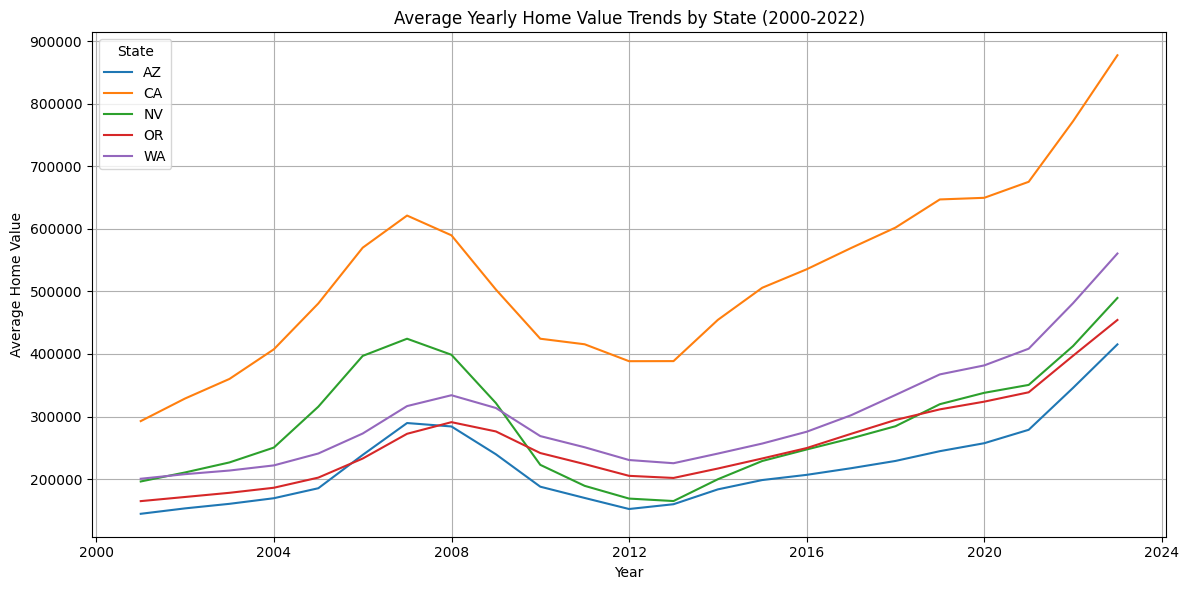

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to make State and Date columns available for plotting
df_yearly_plot = df_yearly.reset_index()

# Filter for the selected states as per the project outline
selected_states = ['CA', 'WA', 'OR', 'AZ', 'NV']
df_yearly_plot_filtered = df_yearly_plot[df_yearly_plot['State'].isin(selected_states)]

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly_plot_filtered, x='Date', y='Value', hue='State')
plt.title('Average Yearly Home Value Trends by State (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Average Home Value')
plt.grid(True)
plt.legend(title='State')
plt.tight_layout()
plt.show()

## Part 2: Time Series Forecasting (Oregon)

### Step 1: Filter Oregon Data and Prepare Monthly Time Series (2000–2018)

In [ ]:
# Filter for Oregon (OR)
df_or = df_melted[df_melted['State'] == 'OR']

# Filter for dates from 2000-01-01 to 2018-12-31
df_or = df_or[(df_or.index >= '2000-01-01') & (df_or.index <= '2018-12-31')]

In [ ]:
# Check for nulls
df_or.isnull().sum()

,0
RegionID,0
SizeRank,0
RegionName,0
RegionType,0
StateName,0
State,0
City,3192
Metro,9804
CountyName,0
Value,16702


In [ ]:
# Resample by month to get average home value in Oregon, selecting only the 'Value' column
df_or_monthly = df_or['Value'].resample('ME').mean()

# Display the first few rows of the monthly Oregon dataframe
display(df_or_monthly.head())

# Display the data type and shape of the monthly Oregon dataframe
print(df_or_monthly.info())
print(f"Shape of the monthly Oregon dataframe: {df_or_monthly.shape}")

,Value
Date,
2000-01-31,162508.613445
2000-02-29,162913.172269
2000-03-31,163011.125523
2000-04-30,163541.908333
2000-05-31,164176.420833


<class 'pandas.core.series.Series'>
DatetimeIndex: 228 entries, 2000-01-31 to 2018-12-31
Freq: ME
Series name: Value
Non-Null Count  Dtype  
--------------  -----  
228 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB
None
Shape of the monthly Oregon dataframe: (228,)


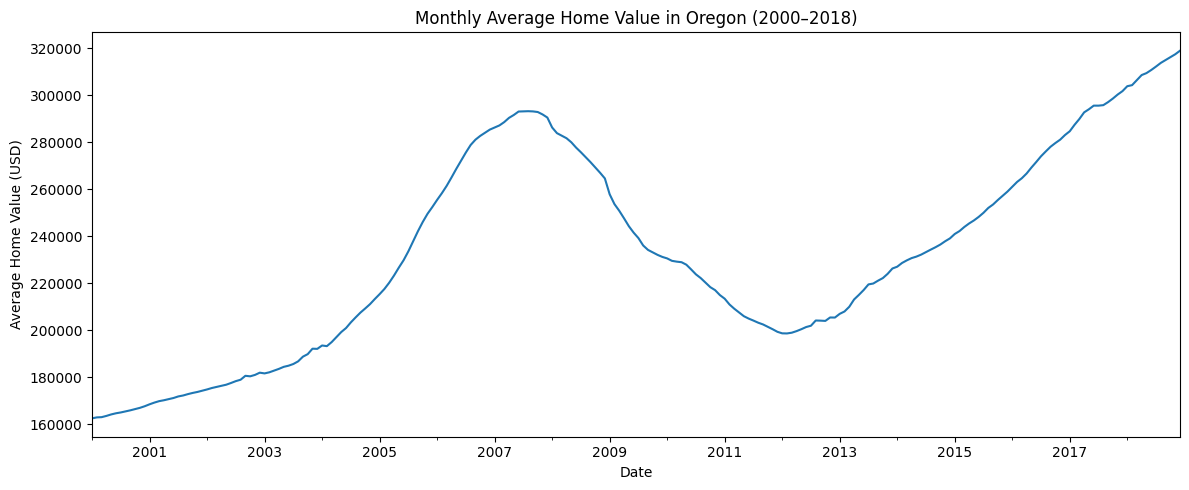

In [ ]:
# Plot the monthly series
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
df_or_monthly.plot()
plt.title("Monthly Average Home Value in Oregon (2000–2018)")
plt.xlabel("Date")
plt.ylabel("Average Home Value (USD)")
plt.tight_layout()
plt.show()

### Step 2: Handle Missing Values and Decompose the Time Series

In [ ]:
# Check for missing values
df_or_monthly.isnull().sum()

0

<Figure size 1200x800 with 0 Axes>

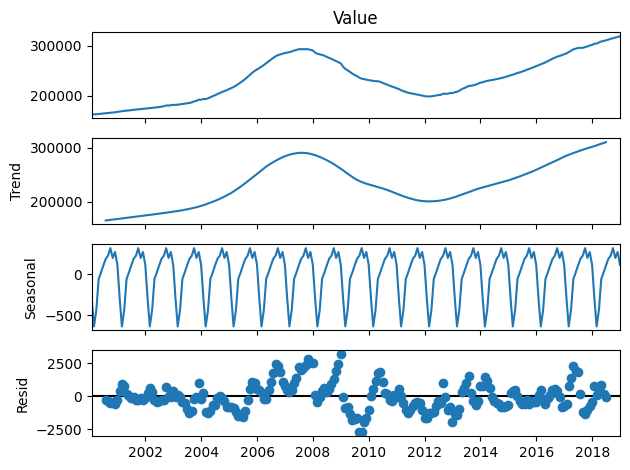

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df_or_monthly, model='additive', period=12)

# Plot the original, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

### Step 3: Check for Stationarity and Plot ACF/PACF

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ADF Test
adf_test = adfuller(df_or_monthly)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Interpret the result
if adf_test[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -1.7860147312224453
p-value: 0.38742676268034715
The time series is not stationary.


In [ ]:
# Apply first-order differencing
df_diff = df_or_monthly.diff().dropna()

<Figure size 1200x800 with 0 Axes>

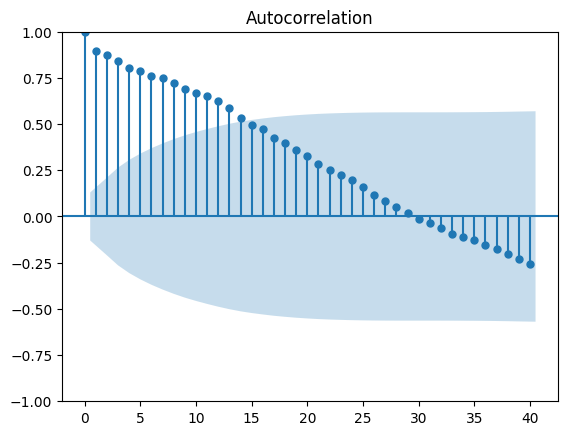

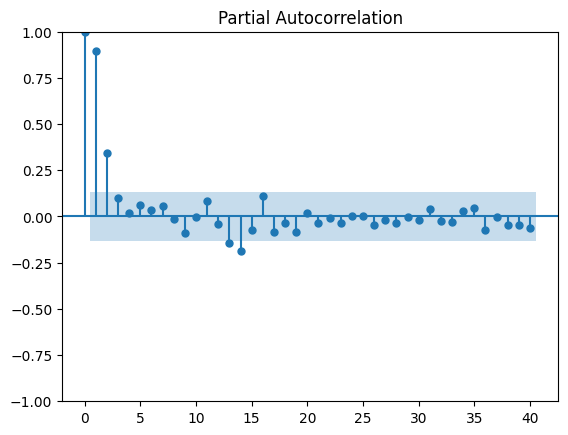

In [ ]:
# Plot ACF and PACF
plt.figure(figsize=(12, 8))
plot_acf(df_diff, lags=40)
plot_pacf(df_diff, lags=40)
plt.show()

### Step 4: Manual ARIMA/SARIMA Modeling

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define model order
model = SARIMAX(df_or_monthly, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
model_fit = model.fit()

# Print summary
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  228
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1859.238
Date:                            Fri, 19 Sep 2025   AIC                           3728.476
Time:                                    23:50:30   BIC                           3745.329
Sample:                                01-31-2000   HQIC                          3735.285
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9225      0.031     29.439      0.000       0.861       0.984
ma.L1         -0.8772      0.030   

Model Evaluation Metrics:
AIC: 3728.475619528662
BIC: 3745.3288096693


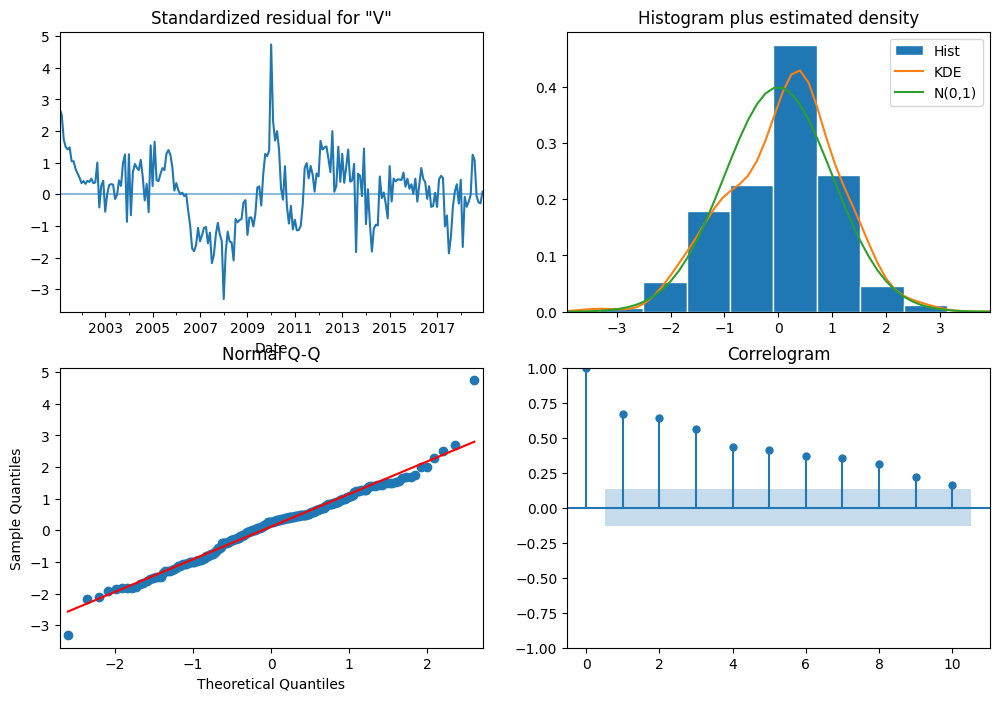

In [ ]:
# Evaluate the model (using metrics from the summary)
print("Model Evaluation Metrics:")
print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")

# You can also plot residuals to check for patterns
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

### Step 5: Forecasting with Manual ARIMA and Evaluation

In [ ]:
# Split the data
train = df_or_monthly[:int(0.8*(len(df_or_monthly)))]
test = df_or_monthly[int(0.8*(len(df_or_monthly))):]

# Fit the model on training data
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast for the length of the test set
forecast_steps = len(test) # Calculate the number of steps based on the test set length
forecast = model_fit.get_forecast(steps=forecast_steps)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

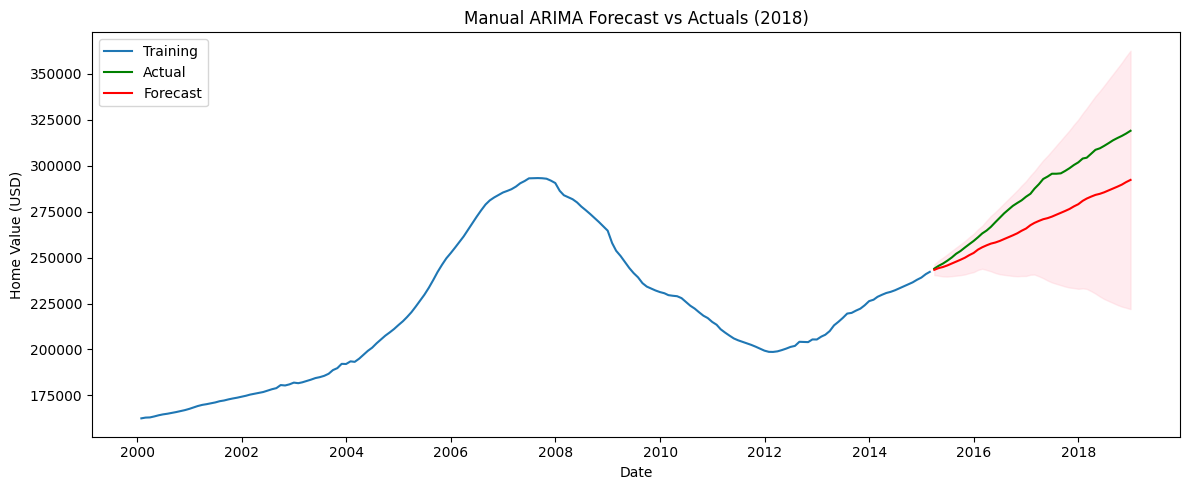

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Plot forecast vs actual
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Training') # Use 'train' directly as it's a Series
plt.plot(test.index, test, label='Actual', color='green') # Use 'test' directly as it's a Series
plt.plot(test.index, mean_forecast, label='Forecast', color='red') # Corrected variable name
plt.fill_between(test.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3) # Corrected variable name
plt.title('Manual ARIMA Forecast vs Actuals (2018)')
plt.xlabel('Date')
plt.ylabel('Home Value (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Evaluation Metrics
mae = mean_absolute_error(test, mean_forecast)
mse = mean_squared_error(test, mean_forecast)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 16197.809033066344
Mean Squared Error (MSE): 333614711.25169486


### Step 6: Automated ARIMA Modeling with `auto_arima`

In [ ]:
!pip install numpy==1.26.4
!pip install pmdarima==2.0.4

In [ ]:
from pmdarima import auto_arima

# Auto-tune ARIMA parameters using the training data
model_auto = auto_arima(train, seasonal=True, m=12, trace=True, suppress_warnings=True,
                        error_action='ignore', stepwise=True)

# Fit the model on the training data (already done by auto_arima if stepwise=True)
# model_auto.fit(train) # No need to refit if stepwise is True

# Summary
print(model_auto.summary())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=2932.929, Time=1.10 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=2921.073, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=2926.184, Time=0.06 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,1)[12]             : AIC=2926.181, Time=0.13 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(1,0,0)[12]             : AIC=2922.897, Time=0.27 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(0,0,1)[12]             : AIC=2922.897, Time=0.36 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(1,0,1)[12]             : AIC=2926.639, Time=1.61 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=2924.412, Time=0.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[12]             : AIC=2924.407, Time=0.23 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[12]             : AIC=2925.777, Time=0.38 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=2923.067, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 4.302 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  182
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1459.537
Date:                Fri, 19 Sep 2025   AIC                           2921.073
Time:                        23:50:49   BIC                           2924.266
Sample:                    01-31-2000   HQIC                          2922.368
                         - 02-28-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Forecast using the auto_arima model fitted on the training data
forecast_steps = len(test) # We want to forecast for the length of the test set

# Use the predict method to generate forecast and confidence intervals for the test period
forecast_auto, forecast_ci_auto = model_auto.predict(n_periods=forecast_steps, return_conf_int=True)

# Convert the numpy array forecast to a pandas Series with the test set index
forecast_mean_auto = pd.Series(forecast_auto, index=test.index)

# Convert the confidence intervals numpy array to a pandas DataFrame with the test set index
forecast_ci_auto = pd.DataFrame(forecast_ci_auto, index=test.index, columns=['lower', 'upper'])

# Print the forecast for the test period (optional)
print("Auto-ARIMA Forecast for the Test Period:")
print(forecast_mean_auto.head())

# Print confidence intervals (optional)
# print("Confidence Intervals:")
# print(forecast_ci_auto.head())

Auto-ARIMA Forecast for the Test Period:
Date
2015-03-31    243493.648969
2015-04-30    244743.842281
2015-05-31    245994.035593
2015-06-30    247244.228905
2015-07-31    248494.422217
Freq: ME, dtype: float64


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


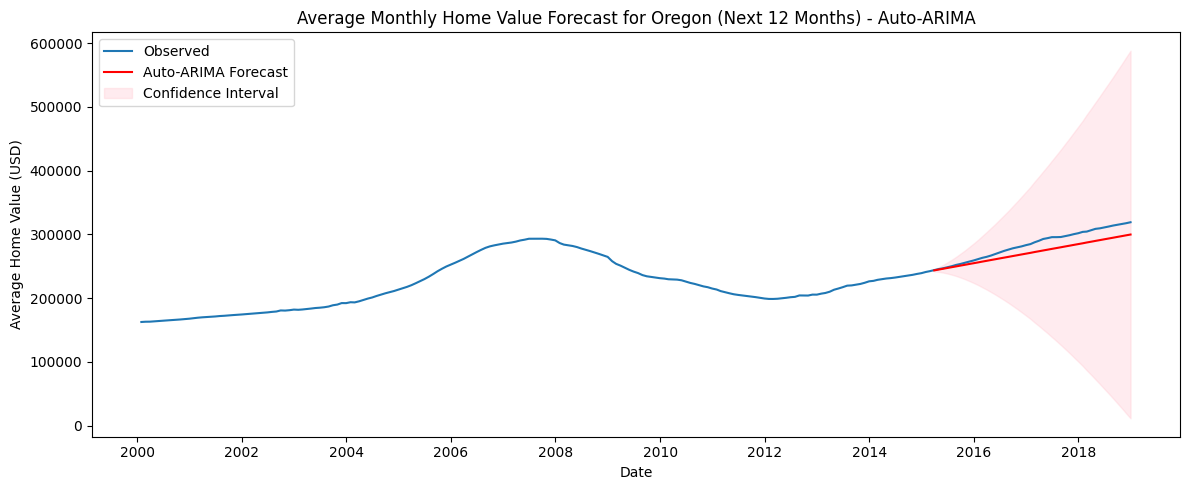

In [ ]:
# Plot forecast vs actual
plt.figure(figsize=(12, 5))
plt.plot(df_or_monthly.index, df_or_monthly, label='Observed') # Plot the full historical data
plt.plot(forecast_mean_auto.index, forecast_mean_auto, color='red', label='Auto-ARIMA Forecast') # Plot the auto-ARIMA forecast
plt.fill_between(forecast_ci_auto.index,
                 forecast_ci_auto.iloc[:, 0],
                 forecast_ci_auto.iloc[:, 1], color='pink', alpha=.3, label='Confidence Interval') # Plot confidence intervals
plt.title('Average Monthly Home Value Forecast for Oregon (Next 12 Months) - Auto-ARIMA')
plt.xlabel('Date')
plt.ylabel('Average Home Value (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluation Metrics for Auto-ARIMA
mae_auto = mean_absolute_error(test, forecast_mean_auto)
mse_auto = mean_squared_error(test, forecast_mean_auto)

print("Auto-ARIMA Model Evaluation Metrics (on Test Set):")
print(f"Mean Absolute Error (MAE): {mae_auto}")
print(f"Mean Squared Error (MSE): {mse_auto}")

# You can now compare these metrics to the manual model's metrics (mae and mse)
# print("\nManual SARIMA Model Evaluation Metrics (on Test Set):")
# print(f"Mean Absolute Error (MAE): {mae}")
# print(f"Mean Squared Error (MSE): {mse}")

Auto-ARIMA Model Evaluation Metrics (on Test Set):
Mean Absolute Error (MAE): 12135.635221335207
Mean Squared Error (MSE): 190181023.0790723


### Step 7: Final Forecast and Summary (Jan–Dec 2019)

In [ ]:
# Retrain on the full dataset (up to Dec 2018)
final_model = SARIMAX(df_or_monthly,
                      order=model_auto.order,
                      seasonal_order=model_auto.seasonal_order,
                      enforce_stationarity=False,
                      enforce_invertibility=False)

final_results = final_model.fit()

In [ ]:
# Forecast next 12 months
future_forecast = final_results.get_forecast(steps=12)
future_mean = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()

/tmp/ipython-input-1126458001.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2019-01-31', periods=12, freq='M')


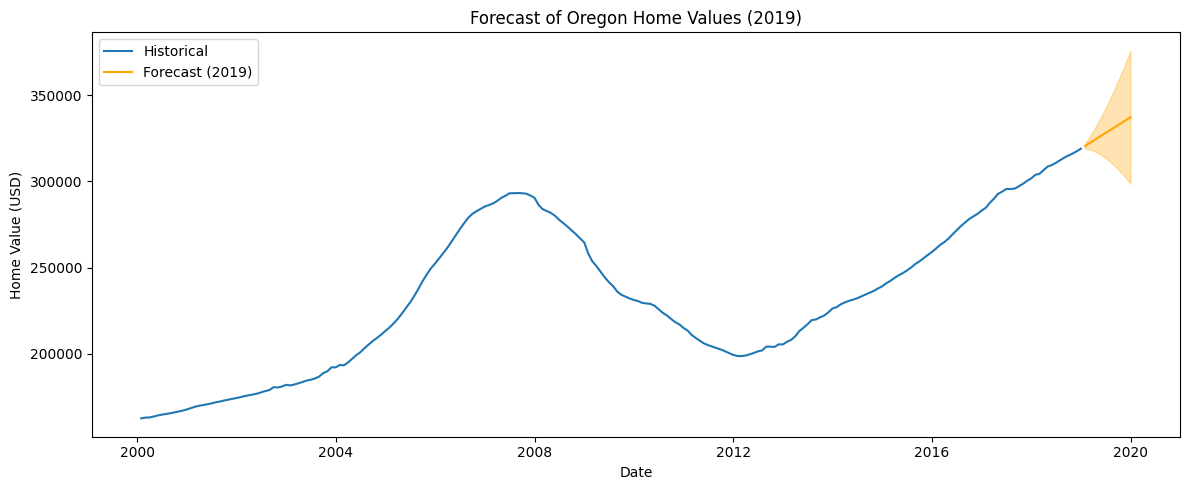

In [ ]:
# Generate future dates
future_dates = pd.date_range(start='2019-01-31', periods=12, freq='M')
future_mean.index = future_dates
future_ci.index = future_dates

# Plot the forecast
plt.figure(figsize=(12, 5))
plt.plot(df_or_monthly.index, df_or_monthly, label='Historical')
plt.plot(future_mean.index, future_mean, label='Forecast (2019)', color='orange')
plt.fill_between(future_ci.index,
                 future_ci.iloc[:, 0],
                 future_ci.iloc[:, 1],
                 color='orange', alpha=0.3)
plt.title('Forecast of Oregon Home Values (2019)')
plt.xlabel('Date')
plt.ylabel('Home Value (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Summary Calculations
start_val = future_mean.iloc[0]
end_val = future_mean.iloc[-1]
pct_change = ((end_val - start_val) / start_val) * 100
print(f"Starting Value: ${start_val:.2f}")
print(f"Ending Value: ${end_val:.2f}")
print(f"Percentage Change: {pct_change:.2f}%")

Starting Value: $320543.70
Ending Value: $337253.12
Percentage Change: 5.21%
